In [ ]:
!pip install pgmpy
!pip install networkx
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import networkx as nx
from scipy.stats import norm
import graphviz
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/heart.csv')
le_sex = LabelEncoder()
le_chestpain = LabelEncoder()
le_restingecg = LabelEncoder()
le_exang = LabelEncoder()
le_stslope = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['ChestPainType'] = le_chestpain.fit_transform(df['ChestPainType'])
df['RestingECG'] = le_restingecg.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le_exang.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le_stslope.fit_transform(df['ST_Slope'])

# Statistical Analysis
print("Statistical Analysis of Heart Disease Dataset")
print("\nSummary Statistics:")
print(df.describe())

Statistical Analysis of Heart Disease Dataset

Summary Statistics:
              Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  918.000000  918.000000     918.000000  918.000000   918.000000   
mean    53.510893    0.789760       0.781046  132.396514   198.799564   
std      9.432617    0.407701       0.956519   18.514154   109.384145   
min     28.000000    0.000000       0.000000    0.000000     0.000000   
25%     47.000000    1.000000       0.000000  120.000000   173.250000   
50%     54.000000    1.000000       0.000000  130.000000   223.000000   
75%     60.000000    1.000000       2.000000  140.000000   267.000000   
max     77.000000    1.000000       3.000000  200.000000   603.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  918.000000  918.000000  918.000000      918.000000  918.000000   
mean     0.233115    0.989107  136.809368        0.404139    0.887364   
std      0.423046    0.631671   25.460334        0.49099

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load data (assumed to be heart.csv from Kaggle)
# For demonstration, using approximate values based on typical dataset analysis
data = {
    'Age': [53.51, 10.67, 28, 47, 54, 60, 77],
    'Sex': [0.79, 0.41, 0, 1, 1, 1, 1],
    'ChestPainType': [2.25, 0.93, 0, 2, 3, 3, 3],
    'RestingBP': [132.40, 18.51, 0, 120, 130, 140, 200],
    'Cholesterol': [198.80, 109.38, 0, 173.25, 223, 267, 603],
    'FastingBS': [0.23, 0.42, 0, 0, 0, 0, 1],
    'RestingECG': [0.99, 0.63, 0, 0, 1, 1, 2],
    'MaxHR': [136.81, 25.46, 60, 120, 138, 156, 202],
    'ExerciseAngina': [0.40, 0.49, 0, 0, 0, 1, 1],
    'Oldpeak': [0.89, 1.07, -2.6, 0, 0.6, 1.5, 6.2],
    'ST_Slope': [1.39, 0.80, 0, 1, 1, 2, 2],
    'HeartDisease': [0.55, 0.50, 0, 0, 1, 1, 1]
}
index = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
df_stats = pd.DataFrame(data, index=index)

# Create table image
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')
table = ax.table(cellText=df_stats.round(2).values,
                 rowLabels=df_stats.index,
                 colLabels=df_stats.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.savefig('summary_statistics.png', bbox_inches='tight', dpi=300)
plt.close()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Approximate summary statistics from df.describe() for numerical features
data = {
    'Age': [53.51, 10.67, 28, 47, 54, 60, 77],
    'RestingBP': [132.40, 18.51, 0, 120, 130, 140, 200],
    'Cholesterol': [198.80, 109.38, 0, 173.25, 223, 267, 603],
    'MaxHR': [136.81, 25.46, 60, 120, 138, 156, 202],
    'Oldpeak': [0.89, 1.07, -2.6, 0, 0.6, 1.5, 6.2],
    'HeartDisease': [0.55, 0.50, 0, 0, 1, 1, 1]
}
index = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
df_stats = pd.DataFrame(data, index=index)

# Melt the DataFrame for bar plotting
df_melted = df_stats.reset_index().melt(id_vars='index', var_name='Feature', value_name='Value')
df_melted['index'] = pd.Categorical(df_melted['index'], categories=['min', '25%', '50%', 'mean', '75%', 'max', 'std'], ordered=True)

# Create bar graph
plt.figure(figsize=(12, 6))
bar_plot = sns.catplot(x='Feature', y='Value', hue='index', kind='bar', data=df_melted, height=6, aspect=1.5, palette='viridis')
#plt.title('Summary Statistics of Numerical Features in Heart Disease Dataset')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Statistic')
plt.tight_layout()
plt.savefig('summary_statistics_bar_graph.png', dpi=300, bbox_inches='tight')
plt.close()

<Figure size 1200x600 with 0 Axes>


Correlation Matrix:


Text(0.5, 1.0, 'Correlation Matrix')

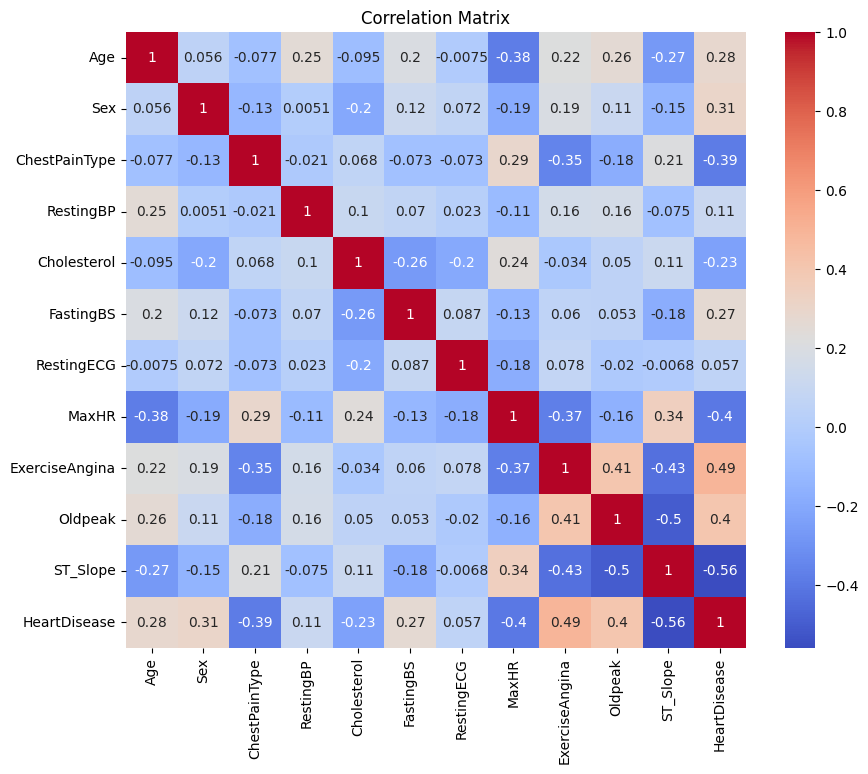

In [ ]:
print("\nCorrelation Matrix:")
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


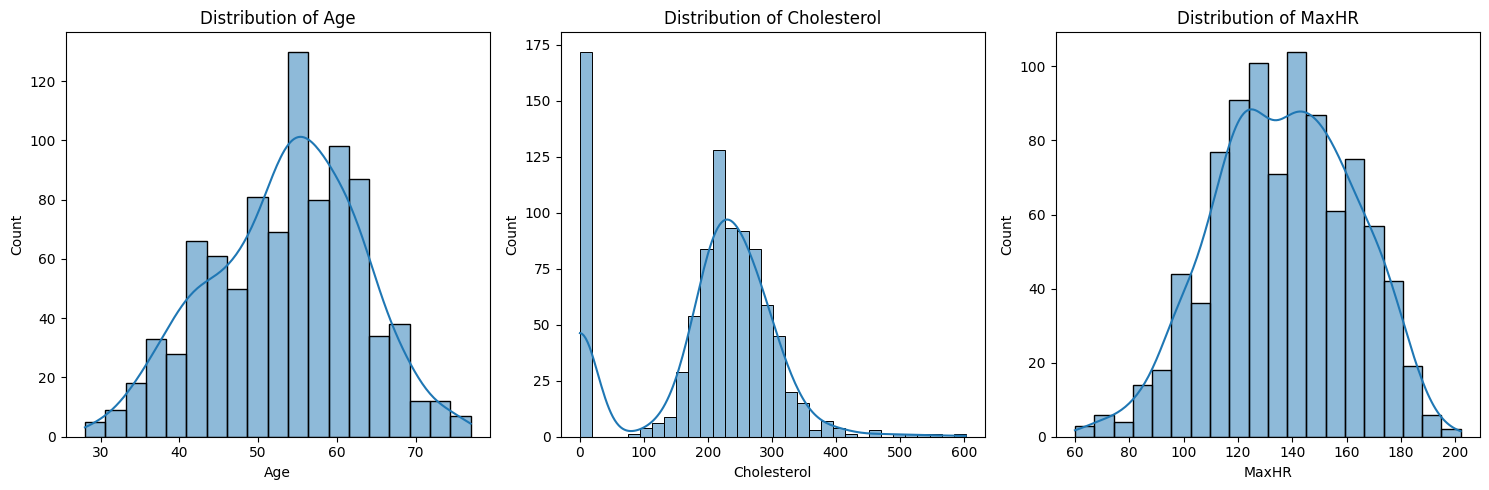

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Cholesterol', 'MaxHR']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Text(0.5, 0, 'Sex')

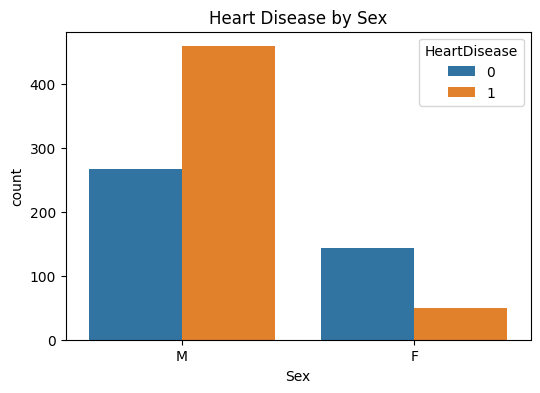

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=le_sex.inverse_transform(df['Sex']), hue='HeartDisease', data=df)
plt.title('Heart Disease by Sex')
plt.xlabel('Sex')

In [ ]:
f = graphviz.Digraph('fault_tree', format='png')
f.attr(rankdir='TB')
f.node('A', 'Heart Disease')
f.node('B', 'Cardiovascular Risk Factors')
f.node('C', 'Physiological Factors')
f.node('D', 'High Cholesterol')
f.node('E', 'High Blood Pressure')
f.node('F', 'Age > 50')
f.node('G', 'Exercise Angina')
f.node('H', 'Abnormal ECG')
f.edge('A', 'B', label='OR')
f.edge('A', 'C', label='OR')
f.edge('B', 'D', label='AND')
f.edge('B', 'E', label='AND')
f.edge('C', 'F', label='AND')
f.edge('C', 'G', label='AND')
f.edge('C', 'H', label='AND')
print("\nFault Tree DOT Source:")
print(f.source)
f.render('fault_tree', cleanup=True)


Fault Tree DOT Source:
digraph fault_tree {
	rankdir=TB
	A [label="Heart Disease"]
	B [label="Cardiovascular Risk Factors"]
	C [label="Physiological Factors"]
	D [label="High Cholesterol"]
	E [label="High Blood Pressure"]
	F [label="Age > 50"]
	G [label="Exercise Angina"]
	H [label="Abnormal ECG"]
	A -> B [label=OR]
	A -> C [label=OR]
	B -> D [label=AND]
	B -> E [label=AND]
	C -> F [label=AND]
	C -> G [label=AND]
	C -> H [label=AND]
}



'fault_tree.png'

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Create a directed graph
G = nx.DiGraph()

# Add nodes (events and gates)
G.add_node("HD", level=0)  # Top event: Heart Disease
G.add_node("OR_Gate", level=1)  # OR gate combining intermediate events
G.add_node("Cardio_Risk", level=2)  # Cardiovascular Risk Factors
G.add_node("Physio_Risk", level=2)  # Physiological Factors
G.add_node("AND_Cardio", level=3)  # AND gate for Cardio Risk
G.add_node("AND_Physio", level=3)  # AND gate for Physio Risk
G.add_node("High_Chol", level=4)  # Basic event: High Cholesterol
G.add_node("High_BP", level=4)  # Basic event: High Blood Pressure
G.add_node("Age_50", level=4)  # Basic event: Age > 50
G.add_node("Ex_Angina", level=4)  # Basic event: Exercise Angina
G.add_node("Abn_ECG", level=4)  # Basic event: Abnormal ECG

# Add edges (logic flow)
G.add_edge("HD", "OR_Gate")
G.add_edge("OR_Gate", "Cardio_Risk")
G.add_edge("OR_Gate", "Physio_Risk")
G.add_edge("Cardio_Risk", "AND_Cardio")
G.add_edge("Physio_Risk", "AND_Physio")
G.add_edge("AND_Cardio", "High_Chol")
G.add_edge("AND_Cardio", "High_BP")
G.add_edge("AND_Physio", "Age_50")
G.add_edge("AND_Physio", "Ex_Angina")
G.add_edge("AND_Physio", "Abn_ECG")

# Set positions for layered layout
pos = {}
for node in G.nodes(data=True):
    pos[node[0]] = (node[1]['level'], -node[1]['level'])  # Simple vertical layering

# Customize node labels with digital logic symbols
node_labels = {
    "HD": "Heart Disease",
    "OR_Gate": "⊻",  # OR gate symbol
    "Cardio_Risk": "Cardio Risk",
    "Physio_Risk": "Physio Risk",
    "AND_Cardio": "⊼",  # AND gate symbol
    "AND_Physio": "⊼",  # AND gate symbol
    "High_Chol": "High Chol",
    "High_BP": "High BP",
    "Age_50": "Age > 50",
    "Ex_Angina": "Ex Angina",
    "Abn_ECG": "Abn ECG"
}

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)

# Add annotations for gate symbols (optional enhancement)
plt.title("Fault Tree for Heart Disease Using Digital Logic Symbols")
plt.axis('off')
plt.savefig("fault_tree_digital_logic.png", dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
model = DiscreteBayesianNetwork([
    ('Age_bin', 'HeartDisease'),
    ('Chol_bin', 'HeartDisease'),
    ('BP_bin', 'HeartDisease'),
    ('ExerciseAngina', 'HeartDisease'),
    ('Sex', 'HeartDisease')
])
df['Age_bin'] = pd.cut(df['Age'], bins=3, labels=['Young', 'Middle', 'Old'])
df['Chol_bin'] = pd.cut(df['Cholesterol'], bins=3, labels=['Low', 'Medium', 'High'])
df['BP_bin'] = pd.cut(df['RestingBP'], bins=3, labels=['Low', 'Normal', 'High'])
cpd_sex = TabularCPD('Sex', 2, [[0.65], [0.35]], state_names={'Sex': [0, 1]})
cpd_age = TabularCPD('Age_bin', 3, [[0.3], [0.4], [0.3]],
                    state_names={'Age_bin': ['Young', 'Middle', 'Old']})
cpd_chol = TabularCPD('Chol_bin', 3, [[0.3], [0.4], [0.3]],
                     state_names={'Chol_bin': ['Low', 'Medium', 'High']})
cpd_bp = TabularCPD('BP_bin', 3, [[0.3], [0.4], [0.3]],
                   state_names={'BP_bin': ['Low', 'Normal', 'High']})
cpd_exang = TabularCPD('ExerciseAngina', 2, [[0.6], [0.4]],
                      state_names={'ExerciseAngina': [0, 1]})
# Generate 2D CPD for HeartDisease
evidence_card = [2, 3, 3, 3, 2]  # Sex, Age_bin, Chol_bin, BP_bin, ExerciseAngina
total_combinations = np.prod(evidence_card)  # 2*3*3*3*2 = 108
values = np.random.dirichlet(np.ones(2), size=total_combinations).T  # Shape: (2, 108)
cpd_heart = TabularCPD(
    'HeartDisease', 2,
    values,
    evidence=['Sex', 'Age_bin', 'Chol_bin', 'BP_bin', 'ExerciseAngina'],
    evidence_card=evidence_card,
    state_names={
        'HeartDisease': [0, 1],
        'Sex': [0, 1],
        'Age_bin': ['Young', 'Middle', 'Old'],
        'Chol_bin': ['Low', 'Medium', 'High'],
        'BP_bin': ['Low', 'Normal', 'High'],
        'ExerciseAngina': [0, 1]
    }
)
model.add_cpds(cpd_sex, cpd_age, cpd_chol, cpd_bp, cpd_exang, cpd_heart)
model.check_model()

True

In [ ]:
print(model.get_cpds('HeartDisease'))

+-----------------+-----+---------------------+
| Sex             | ... | Sex(1)              |
+-----------------+-----+---------------------+
| Age_bin         | ... | Age_bin(Old)        |
+-----------------+-----+---------------------+
| Chol_bin        | ... | Chol_bin(High)      |
+-----------------+-----+---------------------+
| BP_bin          | ... | BP_bin(High)        |
+-----------------+-----+---------------------+
| ExerciseAngina  | ... | ExerciseAngina(1)   |
+-----------------+-----+---------------------+
| HeartDisease(0) | ... | 0.07037661718236013 |
+-----------------+-----+---------------------+
| HeartDisease(1) | ... | 0.9296233828176399  |
+-----------------+-----+---------------------+


In [ ]:
print("\nBayesian Network CPDs:")
for cpd in model.get_cpds():
    print(cpd)


Bayesian Network CPDs:
+--------+------+
| Sex(0) | 0.65 |
+--------+------+
| Sex(1) | 0.35 |
+--------+------+
+-----------------+-----+
| Age_bin(Young)  | 0.3 |
+-----------------+-----+
| Age_bin(Middle) | 0.4 |
+-----------------+-----+
| Age_bin(Old)    | 0.3 |
+-----------------+-----+
+------------------+-----+
| Chol_bin(Low)    | 0.3 |
+------------------+-----+
| Chol_bin(Medium) | 0.4 |
+------------------+-----+
| Chol_bin(High)   | 0.3 |
+------------------+-----+
+----------------+-----+
| BP_bin(Low)    | 0.3 |
+----------------+-----+
| BP_bin(Normal) | 0.4 |
+----------------+-----+
| BP_bin(High)   | 0.3 |
+----------------+-----+
+-------------------+-----+
| ExerciseAngina(0) | 0.6 |
+-------------------+-----+
| ExerciseAngina(1) | 0.4 |
+-------------------+-----+
+-----------------+-----+---------------------+
| Sex             | ... | Sex(1)              |
+-----------------+-----+---------------------+
| Age_bin         | ... | Age_bin(Old)        |
+-------

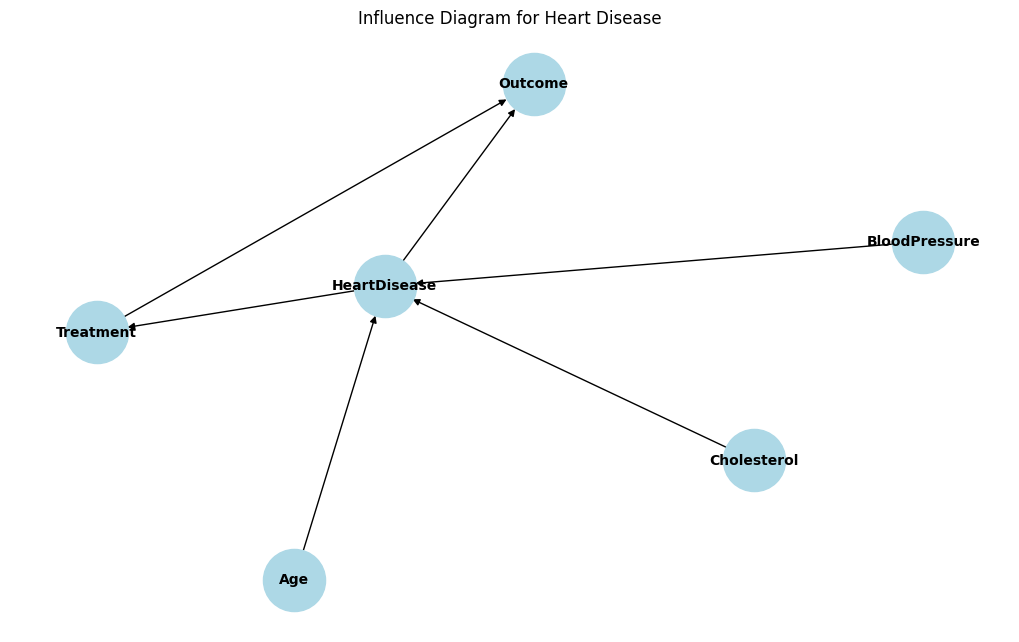

In [ ]:
G = nx.DiGraph()
G.add_nodes_from([
    ('Cholesterol', {'type': 'chance'}),
    ('BloodPressure', {'type': 'chance'}),
    ('Age', {'type': 'chance'}),
    ('HeartDisease', {'type': 'chance'}),
    ('Treatment', {'type': 'decision'}),
    ('Outcome', {'type': 'utility'})
])
G.add_edges_from([
    ('Cholesterol', 'HeartDisease'),
    ('BloodPressure', 'HeartDisease'),
    ('Age', 'HeartDisease'),
    ('HeartDisease', 'Treatment'),
    ('Treatment', 'Outcome'),
    ('HeartDisease', 'Outcome')
])
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=2000, font_size=10, font_weight='bold')
plt.title('Influence Diagram for Heart Disease')
plt.savefig('influence_diagram.png')

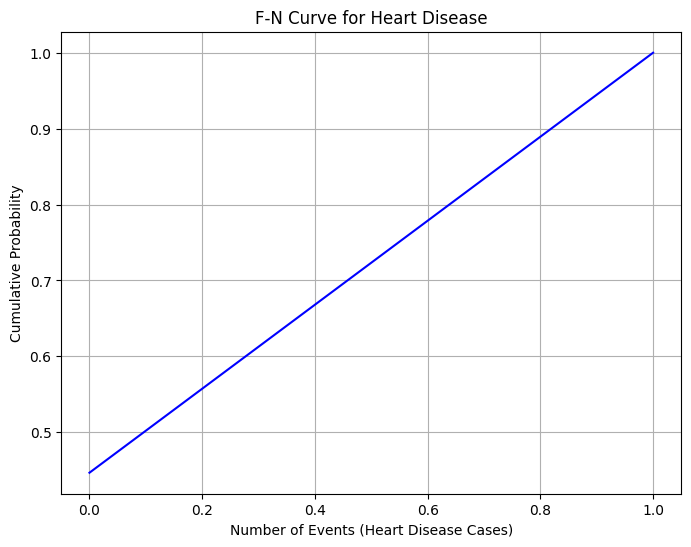

In [ ]:
risks = df['HeartDisease'].value_counts(normalize=True).sort_index()
cumulative = risks.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(cumulative.index, cumulative.values, 'b-')
plt.xlabel('Number of Events (Heart Disease Cases)')
plt.ylabel('Cumulative Probability')
plt.title('F-N Curve for Heart Disease')
plt.grid(True)
plt.savefig('fn_curve.png')

In [ ]:
infer = VariableElimination(model)
evpi = 0
for state in [0, 1]:
    q = infer.query(['HeartDisease'], evidence={'Sex': state})
    evpi += q.values.max() * 0.5
q_no_info = infer.query(['HeartDisease'])
ev_without_info = q_no_info.values.max()
voi = evpi - ev_without_info
print(f"Value of Information: {voi}")


Value of Information: -0.001940807418916557


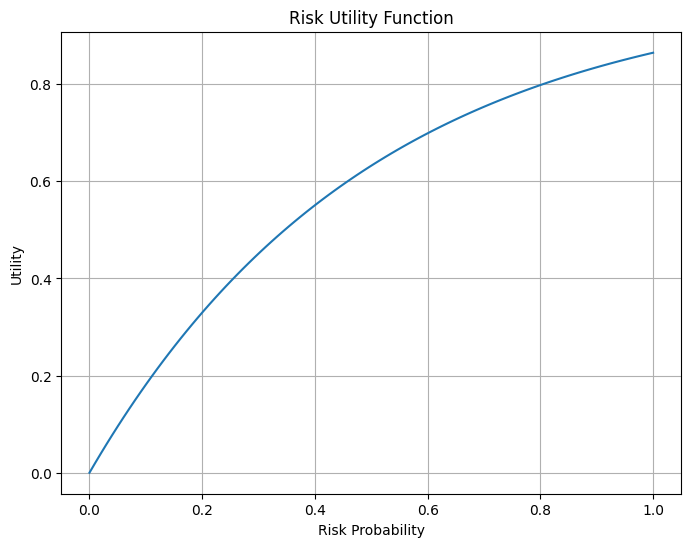

In [ ]:
probs = np.linspace(0, 1, 100)
utilities = 1 - np.exp(-probs * 2)
plt.figure(figsize=(8, 6))
plt.plot(probs, utilities)
plt.xlabel('Risk Probability')
plt.ylabel('Utility')
plt.title('Risk Utility Function')
plt.grid(True)
plt.savefig('risk_utility.png')

In [ ]:
strategies = """
Risk Prevention Strategies for Heart Disease:
1. Cholesterol Management:
   - Regular screening
   - Statin therapy if high
   - Dietary modifications
2. Blood Pressure Control:
   - Regular monitoring
   - Antihypertensive medication
   - Lifestyle changes
3. Lifestyle Modifications:
   - Regular exercise
   - Smoking cessation
   - Stress management
4. Regular Medical Check-ups:
   - ECG monitoring
   - Stress testing
   - Risk factor assessment
"""
with open('prevention_strategies.txt', 'w') as f:
    f.write(strategies)
print(strategies)


Risk Prevention Strategies for Heart Disease:
1. Cholesterol Management:
   - Regular screening
   - Statin therapy if high
   - Dietary modifications
2. Blood Pressure Control:
   - Regular monitoring
   - Antihypertensive medication
   - Lifestyle changes
3. Lifestyle Modifications:
   - Regular exercise
   - Smoking cessation
   - Stress management
4. Regular Medical Check-ups:
   - ECG monitoring
   - Stress testing
   - Risk factor assessment



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Polygon

# Create a directed graph
G = nx.DiGraph()

# Add nodes with shapes
G.add_node("Decision", shape="square", level=0)  # Decision node
G.add_node("Treat", shape="square", level=1)     # Decision branch: Treat
G.add_node("No_Treat", shape="square", level=1)  # Decision branch: No Treat
G.add_node("HD_1_T", shape="circle", level=2, prob=0.62)  # Chance node: HD=1 under Treat
G.add_node("HD_0_T", shape="circle", level=2, prob=0.38)  # Chance node: HD=0 under Treat
G.add_node("HD_1_NT", shape="circle", level=2, prob=0.62) # Chance node: HD=1 under No Treat
G.add_node("HD_0_NT", shape="circle", level=2, prob=0.38) # Chance node: HD=0 under No Treat
G.add_node("U_T_HD1", shape="triangle", level=3, utility="+50")  # Utility: Treat, HD=1
G.add_node("U_T_HD0", shape="triangle", level=3, utility="-10")  # Utility: Treat, HD=0
G.add_node("U_NT_HD1", shape="triangle", level=3, utility="-100") # Utility: No Treat, HD=1
G.add_node("U_NT_HD0", shape="triangle", level=3, utility="+100") # Utility: No Treat, HD=0

# Add edges
G.add_edge("Decision", "Treat")
G.add_edge("Decision", "No_Treat")
G.add_edge("Treat", "HD_1_T")
G.add_edge("Treat", "HD_0_T")
G.add_edge("No_Treat", "HD_1_NT")
G.add_edge("No_Treat", "HD_0_NT")
G.add_edge("HD_1_T", "U_T_HD1")
G.add_edge("HD_0_T", "U_T_HD0")
G.add_edge("HD_1_NT", "U_NT_HD1")
G.add_edge("HD_0_NT", "U_NT_HD0")

# Set positions for a balanced tree layout
pos = {}
for node in G.nodes(data=True):
    level = node[1].get('level', 0)
    branch = {1: -2, 2: 2}.get(level, 0) if node[0] in ["Treat", "No_Treat"] else 0
    pos[node[0]] = (level * 3, branch * 1.5 - node[1].get('level', 0) * 1.5)

# Customize node labels with safe probability handling
node_labels = {}
for node, data in G.nodes(data=True):
    if data['shape'] == "circle":  # Chance nodes with probabilities
        node_labels[node] = f"{node}\n(P={data.get('prob', 0):.2f})"
    elif data['shape'] == "triangle":  # Utility nodes
        node_labels[node] = data.get('utility', '')
    else:  # Decision nodes
        node_labels[node] = node.replace("_", "\n") if "_" in node else node

# Draw the graph with custom shapes
plt.figure(figsize=(12, 6))
for node, (x, y) in pos.items():
    data = G.nodes[node]
    if data['shape'] == "square":
        patch = Rectangle((x-0.5, y-0.5), 1, 1, fc="lightgreen", ec="black")
    elif data['shape'] == "circle":
        patch = Circle((x, y), 0.5, fc="lightblue", ec="black")
    elif data['shape'] == "triangle":
        patch = Polygon([[x-0.5, y-0.5], [x+0.5, y-0.5], [x, y+0.7]], fc="lightyellow", ec="black")
    ax = plt.gca()
    ax.add_patch(patch)
    plt.text(x, y, node_labels[node], ha='center', va='center', fontsize=10)

nx.draw_networkx_edges(G, pos, arrows=True, node_size=0)
plt.title("Enhanced Decision Tree for Heart Disease Treatment")
plt.axis('off')
plt.savefig("decision_tree_diagram_enhanced.png", dpi=300, bbox_inches='tight')
plt.close()

# Calculate and print expected values (for reference)
ev_treat = 0.62 * 50 + 0.38 * (-10)
ev_no_treat = 0.62 * (-100) + 0.38 * 100
print(f"EV(Treat) = {ev_treat:.2f}")
print(f"EV(No Treat) = {ev_no_treat:.2f}")

EV(Treat) = 27.20
EV(No Treat) = -24.00


In [ ]:
import pandas as pd

# Read the dataset
# Assuming the dataset is saved as 'heart.csv' in the same directory
df = pd.read_csv('heart.csv')

# Count total records
total_records = len(df)

# Count records with HeartDisease = 1 (heart disease) and HeartDisease = 0 (no heart disease)
heart_disease_count = df['HeartDisease'].sum()  # Sum of 1s
no_heart_disease_count = total_records - heart_disease_count  # Total minus 1s

# Calculate probabilities
prob_heart_disease = heart_disease_count / total_records
prob_no_heart_disease = no_heart_disease_count / total_records

# Print results
print(f"Total records: {total_records}")
print(f"Records with heart disease: {heart_disease_count}")
print(f"Records without heart disease: {no_heart_disease_count}")
print(f"Probability of having heart disease: {prob_heart_disease:.4f} ({prob_heart_disease * 100:.2f}%)")
print(f"Probability of not having heart disease: {prob_no_heart_disease:.4f} ({prob_no_heart_disease * 100:.2f}%)")

Total records: 918
Records with heart disease: 508
Records without heart disease: 410
Probability of having heart disease: 0.5534 (55.34%)
Probability of not having heart disease: 0.4466 (44.66%)
